In [7]:
import numpy as np
import networkx as nx
import pylab as plt
from networkx.algorithms.community.centrality import girvan_newman

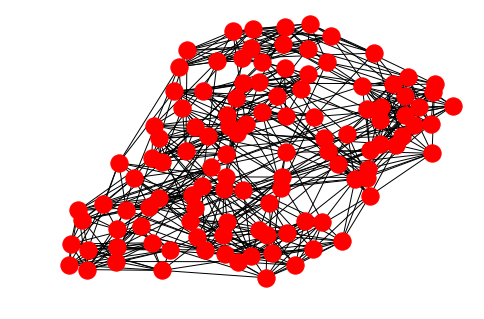

In [31]:
G = nx.read_gml('football.gml')
nx.draw(G)

In [32]:
comp = girvan_newman(G)
res = tuple(sorted(c) for c in next(comp))
print(res)

(['AirForce', 'Arizona', 'ArizonaState', 'ArkansasState', 'Baylor', 'BoiseState', 'BrighamYoung', 'California', 'Colorado', 'ColoradoState', 'FresnoState', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'IowaState', 'Kansas', 'KansasState', 'Michigan', 'MichiganState', 'Minnesota', 'Missouri', 'Nebraska', 'Nevada', 'NevadaLasVegas', 'NewMexico', 'NewMexicoState', 'NorthTexas', 'Northwestern', 'NotreDame', 'OhioState', 'Oklahoma', 'OklahomaState', 'Oregon', 'OregonState', 'PennState', 'Purdue', 'Rice', 'SanDiegoState', 'SanJoseState', 'SouthernCalifornia', 'SouthernMethodist', 'Stanford', 'Texas', 'TexasA&M', 'TexasChristian', 'TexasElPaso', 'TexasTech', 'Tulsa', 'UCLA', 'Utah', 'UtahState', 'Washington', 'WashingtonState', 'Wisconsin', 'Wyoming'], ['Akron', 'Alabama', 'AlabamaBirmingham', 'Arkansas', 'Army', 'Auburn', 'BallState', 'BostonCollege', 'BowlingGreenState', 'Buffalo', 'CentralFlorida', 'CentralMichigan', 'Cincinnati', 'Clemson', 'Connecticut', 'Duke', 'EastCarolina', 'Eas

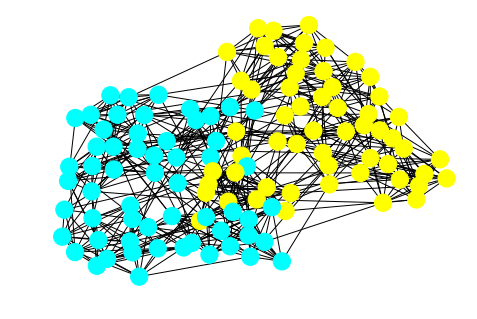

In [43]:
# color nodes by community
attrs = {}
palette = ['yellow', 'cyan','orange','red','magenta', 'silver','grey','blue','green',   'pink','black',]
color = 0
for community in res:
    for node in community:
        #print(palette[color % len(palette)])
        attrs[node]={'color':palette[color % len(palette)]}
    color+=1
nx.set_node_attributes(G, attrs)
colors = nx.get_node_attributes(G, 'color')
#print(colors)
nx.draw(G, node_color=colors.values())

In [44]:
# getting only the first k tuples of communities
import itertools
k=3
comp = girvan_newman(G)
for communities in itertools.islice(comp,k):
    print(tuple(sorted(c) for c in communities))

(['AirForce', 'Arizona', 'ArizonaState', 'ArkansasState', 'Baylor', 'BoiseState', 'BrighamYoung', 'California', 'Colorado', 'ColoradoState', 'FresnoState', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'IowaState', 'Kansas', 'KansasState', 'Michigan', 'MichiganState', 'Minnesota', 'Missouri', 'Nebraska', 'Nevada', 'NevadaLasVegas', 'NewMexico', 'NewMexicoState', 'NorthTexas', 'Northwestern', 'NotreDame', 'OhioState', 'Oklahoma', 'OklahomaState', 'Oregon', 'OregonState', 'PennState', 'Purdue', 'Rice', 'SanDiegoState', 'SanJoseState', 'SouthernCalifornia', 'SouthernMethodist', 'Stanford', 'Texas', 'TexasA&M', 'TexasChristian', 'TexasElPaso', 'TexasTech', 'Tulsa', 'UCLA', 'Utah', 'UtahState', 'Washington', 'WashingtonState', 'Wisconsin', 'Wyoming'], ['Akron', 'Alabama', 'AlabamaBirmingham', 'Arkansas', 'Army', 'Auburn', 'BallState', 'BostonCollege', 'BowlingGreenState', 'Buffalo', 'CentralFlorida', 'CentralMichigan', 'Cincinnati', 'Clemson', 'Connecticut', 'Duke', 'EastCarolina', 'Eas

In [46]:
# choose edge to remove based on the weight
from operator import itemgetter
G = nx.path_graph(10)
edges = G.edges()
nx.set_edge_attributes(G, {(u,v): v for u, v in edges},'weight')
def heaviest(G):
    u,v,w = max(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)
comp = girvan_newman(G, most_valuable_edge=heaviest)
tuple(sorted(c) for c in next(comp))

([0, 1, 2, 3, 4, 5, 6, 7, 8], [9])

In [55]:
# choose edge to remove based on the weight (applied to football network)
from operator import itemgetter
G = nx.read_gml('football.gml')

node_attributes = nx.get_node_attributes(G,'value')
edges = G.edges()
nx.set_edge_attributes(G, {(u,v): node_attributes[v] for u, v in edges},'weight')

#print(G.nodes(data=True))
print("\n\n")
print("\n\n")
print("\n\n")
print("\n\n")
print(G.edges(data=True))


def heaviest(G):
    u,v,w = max(G.edges(data='weight'), key=itemgetter(2))
    return (u, v)
comp = girvan_newman(G, most_valuable_edge=heaviest)
tuple(sorted(c) for c in next(comp))













[('BrighamYoung', 'FloridaState', {'weight': 0}), ('BrighamYoung', 'NewMexico', {'weight': 7}), ('BrighamYoung', 'SanDiegoState', {'weight': 7}), ('BrighamYoung', 'Wyoming', {'weight': 7}), ('BrighamYoung', 'Utah', {'weight': 7}), ('BrighamYoung', 'Virginia', {'weight': 0}), ('BrighamYoung', 'Syracuse', {'weight': 1}), ('BrighamYoung', 'ColoradoState', {'weight': 7}), ('BrighamYoung', 'MississippiState', {'weight': 9}), ('BrighamYoung', 'UtahState', {'weight': 5}), ('BrighamYoung', 'AirForce', {'weight': 7}), ('BrighamYoung', 'NevadaLasVegas', {'weight': 7}), ('FloridaState', 'NorthCarolinaState', {'weight': 0}), ('FloridaState', 'Florida', {'weight': 9}), ('FloridaState', 'Virginia', {'weight': 0}), ('FloridaState', 'GeorgiaTech', {'weight': 0}), ('FloridaState', 'Duke', {'weight': 0}), ('FloridaState', 'Louisville', {'weight': 4}), ('FloridaState', 'NorthCarolina', {'weight': 0}), ('FloridaState', 'MiamiFlorida', {'weight': 1}), ('FloridaState', 'Clemson', {'weight': 0}),

(['AirForce',
  'Akron',
  'Alabama',
  'AlabamaBirmingham',
  'Arizona',
  'ArizonaState',
  'Arkansas',
  'ArkansasState',
  'Army',
  'Auburn',
  'BallState',
  'Baylor',
  'BoiseState',
  'BostonCollege',
  'BowlingGreenState',
  'BrighamYoung',
  'Buffalo',
  'California',
  'CentralFlorida',
  'CentralMichigan',
  'Cincinnati',
  'Clemson',
  'Colorado',
  'ColoradoState',
  'Connecticut',
  'Duke',
  'EastCarolina',
  'EasternMichigan',
  'Florida',
  'FloridaState',
  'FresnoState',
  'Georgia',
  'GeorgiaTech',
  'Houston',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'IowaState',
  'Kansas',
  'KansasState',
  'Kent',
  'Kentucky',
  'LouisianaLafayette',
  'LouisianaMonroe',
  'LouisianaState',
  'LouisianaTech',
  'Louisville',
  'Marshall',
  'Maryland',
  'Memphis',
  'MiamiFlorida',
  'MiamiOhio',
  'Michigan',
  'MichiganState',
  'MiddleTennesseeState',
  'Minnesota',
  'Mississippi',
  'MississippiState',
  'Missouri',
  'Navy',
  'Nebraska',
  'Nevada',
  'Nevad

In [62]:
# modifying edge_betweenness?
from networkx import edge_betweenness_centrality as betweenness
def most_central_edge(G):
    centrality = betweenness(G, weight='weight')
    return max(centrality, key=centrality.get)

G = nx.read_gml('football.gml')
nx.set_edge_attributes(G, {(u,v): 1 for u, v in G.edges()},'weight')

comp = girvan_newman(G, most_valuable_edge=heaviest)
tuple(sorted(c) for c in next(comp))

(['BrighamYoung'],
 ['AirForce',
  'Akron',
  'Alabama',
  'AlabamaBirmingham',
  'Arizona',
  'ArizonaState',
  'Arkansas',
  'ArkansasState',
  'Army',
  'Auburn',
  'BallState',
  'Baylor',
  'BoiseState',
  'BostonCollege',
  'BowlingGreenState',
  'Buffalo',
  'California',
  'CentralFlorida',
  'CentralMichigan',
  'Cincinnati',
  'Clemson',
  'Colorado',
  'ColoradoState',
  'Connecticut',
  'Duke',
  'EastCarolina',
  'EasternMichigan',
  'Florida',
  'FloridaState',
  'FresnoState',
  'Georgia',
  'GeorgiaTech',
  'Hawaii',
  'Houston',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'IowaState',
  'Kansas',
  'KansasState',
  'Kent',
  'Kentucky',
  'LouisianaLafayette',
  'LouisianaMonroe',
  'LouisianaState',
  'LouisianaTech',
  'Louisville',
  'Marshall',
  'Maryland',
  'Memphis',
  'MiamiFlorida',
  'MiamiOhio',
  'Michigan',
  'MichiganState',
  'MiddleTennesseeState',
  'Minnesota',
  'Mississippi',
  'MississippiState',
  'Missouri',
  'Navy',
  'Nebraska',
  'Neva

In [61]:
# modifying edge_betweenness?
from networkx import edge_betweenness_centrality as betweenness
from random import random
def most_central_edge(G):
    centrality = betweenness(G)
    max_cent = max(centrality.values())
    # scale the centrality values so they are between 0 and 1,
    # and add some random noise.
    centrality = {e : c /max_cent for e,c in centraltiy.items()}
    centrality = {e: c+random() for e, c in centrality.items()}
    return max(centrality, key=centrality.get)

G = nx.read_gml('football.gml')
nx.set_edge_attributes(G, {(u,v): 1 for u, v in G.edges()},'weight')
comp = girvan_newman(G, most_valuable_edge=heaviest)
tuple(sorted(c) for c in next(comp))

(['BrighamYoung'],
 ['AirForce',
  'Akron',
  'Alabama',
  'AlabamaBirmingham',
  'Arizona',
  'ArizonaState',
  'Arkansas',
  'ArkansasState',
  'Army',
  'Auburn',
  'BallState',
  'Baylor',
  'BoiseState',
  'BostonCollege',
  'BowlingGreenState',
  'Buffalo',
  'California',
  'CentralFlorida',
  'CentralMichigan',
  'Cincinnati',
  'Clemson',
  'Colorado',
  'ColoradoState',
  'Connecticut',
  'Duke',
  'EastCarolina',
  'EasternMichigan',
  'Florida',
  'FloridaState',
  'FresnoState',
  'Georgia',
  'GeorgiaTech',
  'Hawaii',
  'Houston',
  'Idaho',
  'Illinois',
  'Indiana',
  'Iowa',
  'IowaState',
  'Kansas',
  'KansasState',
  'Kent',
  'Kentucky',
  'LouisianaLafayette',
  'LouisianaMonroe',
  'LouisianaState',
  'LouisianaTech',
  'Louisville',
  'Marshall',
  'Maryland',
  'Memphis',
  'MiamiFlorida',
  'MiamiOhio',
  'Michigan',
  'MichiganState',
  'MiddleTennesseeState',
  'Minnesota',
  'Mississippi',
  'MississippiState',
  'Missouri',
  'Navy',
  'Nebraska',
  'Neva